In [92]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from scipy.stats import zscore
import statsmodels.api as sm

In [3]:
concrete_data1 = pd.read_csv('concrete.csv')

In [4]:
concrete_data1.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
concrete_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
concrete_data1.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
# no null data in the data set

In [8]:
concrete_data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [9]:
#There ars some zero values for some of the attirbutes and we assume that it is okay for these features to have zeros
#since it can be known only by a subject matter expert.

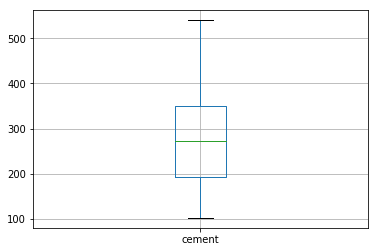

In [10]:
concrete_data1.boxplot('cement')

In [11]:
#for attribute in concrete_data1:
#    if attribute != 'strength':
#        concrete_data1.boxplot(attribute)

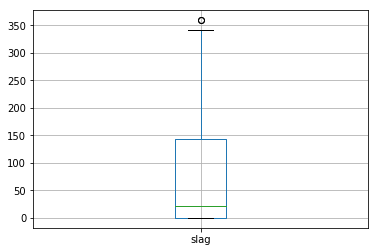

In [12]:
concrete_data1.boxplot('slag')

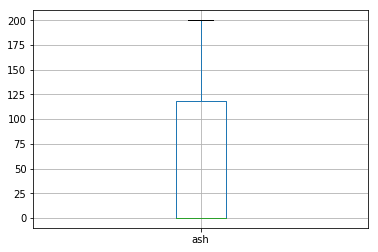

In [13]:
concrete_data1.boxplot('ash')

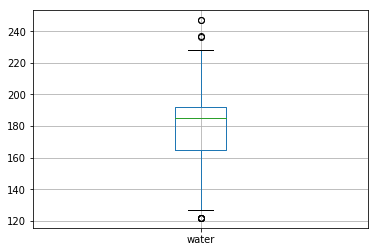

In [14]:
concrete_data1.boxplot('water')

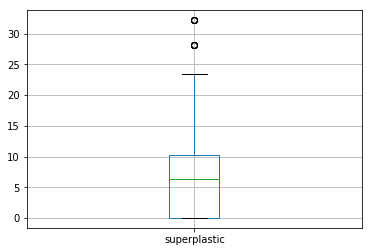

In [15]:
concrete_data1.boxplot('superplastic')

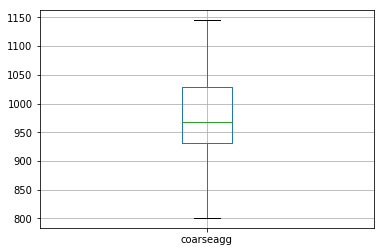

In [16]:
concrete_data1.boxplot('coarseagg')

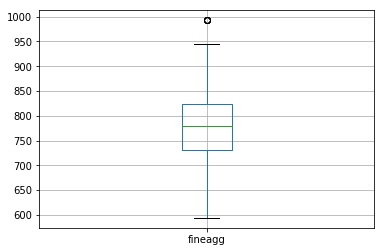

In [17]:
concrete_data1.boxplot('fineagg')

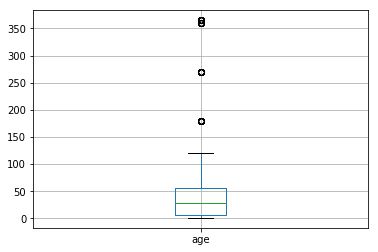

In [18]:
concrete_data1.boxplot('age')

In [19]:
#except for age there arent too many outliers in the attributes so we will replace the outliers with the 
#median value of age column

In [20]:
median  = float(concrete_data1["age"].median())
concrete_data1["age"] = np.where(concrete_data1["age"] > 100, median, concrete_data1["age"])

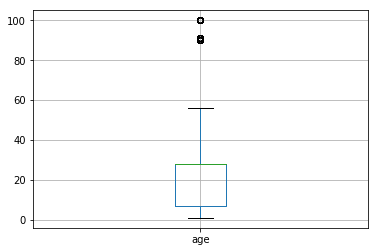

In [21]:
concrete_data1.boxplot('age')

In [22]:
concrete_data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,31.988350,27.396734,1.00,7.000,28.000,28.000,100.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


C:\Users\SONY\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


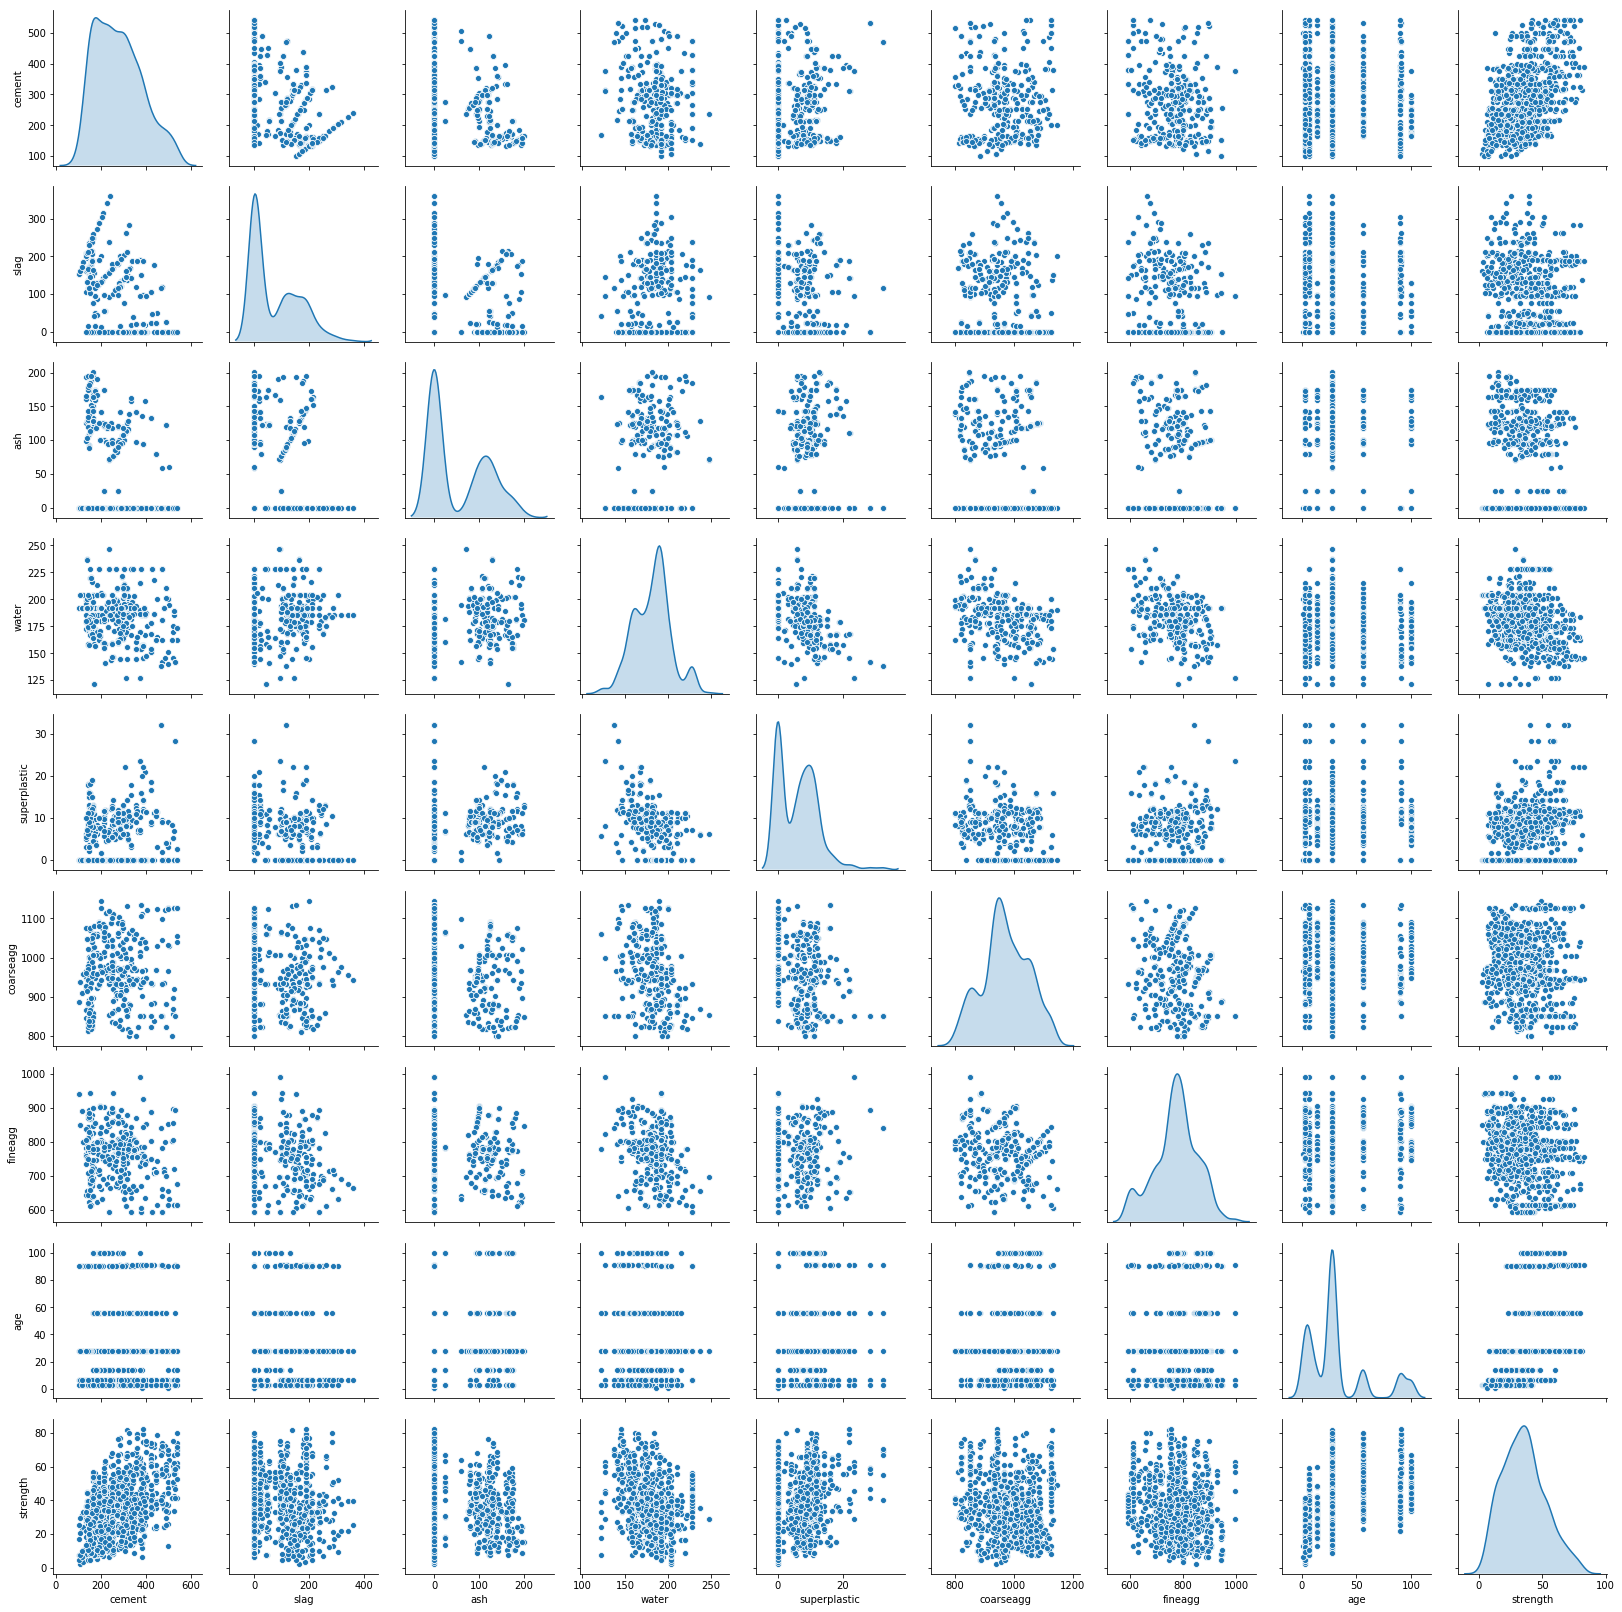

In [23]:
sns.pairplot(concrete_data1, diag_kind='kde')

In [24]:
# except for cement and strength none of the features  have any linear trend  or correlation. May be some subset of 
# datas in the ash and slag, cement and slag show some positive corelation so we can try to seperate the subsets and
# fit linear or polynomial curve to the data.

In [25]:
X = concrete_data1.iloc[:,0:8]
y = concrete_data1.iloc[:,8]
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)

In [26]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)
for idx, col_name in enumerate(X_train.columns):
    print("The  coefficient of  {} is {}".format(col_name,regression_model.coef_[idx]))

The  coefficient of  cement is 0.10735780883299735
The  coefficient of  slag is 0.07195083009022812
The  coefficient of  ash is 0.04501272641040533
The  coefficient of  water is -0.14485171339760952
The  coefficient of  superplastic is 0.18648383240921632
The  coefficient of  coarseagg is -0.004567559354301504
The  coefficient of  fineagg is -0.004268533961537736
The  coefficient of  age is 0.315806902207585


In [27]:
regression_model.score(X_test,y_test)

0.7035337609283477

In [28]:
#Let us try to do select some important features using pearson coeeficient, Ridge and Lasso method

In [29]:
#Pearson method - Here we employ the filter method i.e we take only the features that have high correlation with the 
#target column i.e strength

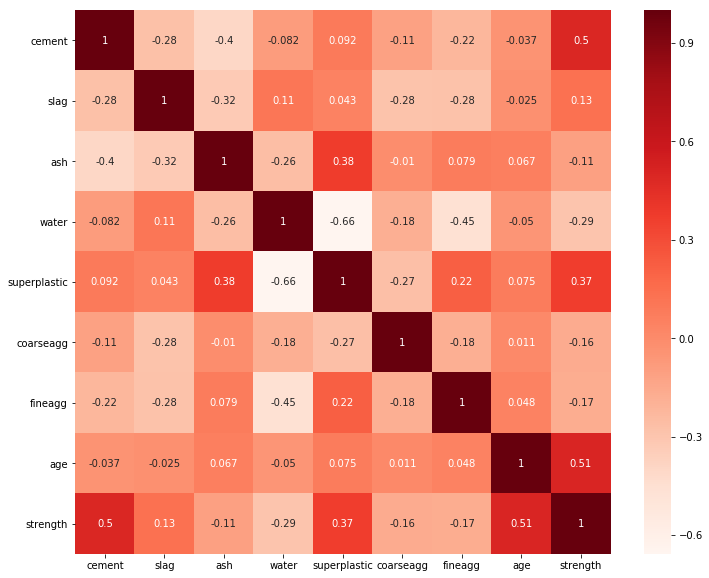

In [30]:
plt.figure(figsize =(12,10))
cor = concrete_data1.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)

In [31]:
cor_target = abs(cor["strength"])
relevant_features = cor_target[cor_target > 0.28]
relevant_features

cement          0.497832
water           0.289633
superplastic    0.366079
age             0.505031
strength        1.000000
Name: strength, dtype: float64

In [32]:
print(concrete_data1[["cement","water"]].corr())
print(concrete_data1[["cement","superplastic"]].corr())
print(concrete_data1[["cement","age"]].corr())

          cement     water
cement  1.000000 -0.081587
water  -0.081587  1.000000
                cement  superplastic
cement        1.000000      0.092386
superplastic  0.092386      1.000000
          cement       age
cement  1.000000 -0.037012
age    -0.037012  1.000000


In [33]:
print(concrete_data1[["water","superplastic"]].corr())
print(concrete_data1[["water","age"]].corr())

                 water  superplastic
water         1.000000     -0.657533
superplastic -0.657533      1.000000
          water       age
water  1.000000 -0.050026
age   -0.050026  1.000000


In [34]:
print(concrete_data1[["superplastic","age"]].corr())

              superplastic       age
superplastic      1.000000  0.074574
age               0.074574  1.000000


In [35]:
#among all the selected features water and superplastic have high correlation so we drop one of the feature 
# so we drop superplastic 

In [36]:
#Rebuilding the model with the selected features i.e cement , water, age

In [37]:
concrete_data2 = concrete_data1.copy()

In [38]:
concrete_data2.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


In [39]:
concrete_data2 = concrete_data2.drop('slag', axis= 1)

In [40]:
concrete_data2.head()

,cement,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


In [41]:
concrete_data2 = concrete_data2.drop('superplastic', axis= 1)

In [42]:
concrete_data2.head()

,cement,ash,water,coarseagg,fineagg,age,strength
0,141.3,0.0,203.5,971.8,748.5,28.0,29.89
1,168.9,124.3,158.3,1080.8,796.2,14.0,23.51
2,250.0,95.7,187.4,956.9,861.2,28.0,29.22
3,266.0,0.0,228.0,932.0,670.0,28.0,45.85
4,154.8,0.0,193.3,1047.4,696.7,28.0,18.29


In [43]:
concrete_data2 = concrete_data2.drop('coarseagg', axis= 1)

In [44]:
concrete_data2 = concrete_data2.drop('fineagg', axis= 1)

In [45]:
concrete_data2 = concrete_data2.drop('ash', axis= 1)

In [46]:
concrete_data2.head()

,cement,water,age,strength
0,141.3,203.5,28.0,29.89
1,168.9,158.3,14.0,23.51
2,250.0,187.4,28.0,29.22
3,266.0,228.0,28.0,45.85
4,154.8,193.3,28.0,18.29


In [47]:
X2 = concrete_data2.iloc[:,0:3]
y2 = concrete_data2.iloc[:,3]
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30, random_state=seed)

In [48]:
regression_model2 = LinearRegression()
regression_model2.fit(X_train,y_train)
for idx, col_name in enumerate(X_train.columns):
    print("The  coefficient of  {} is {}".format(col_name,regression_model2.coef_[idx]))

The  coefficient of  cement is 0.08169806288126008
The  coefficient of  water is -0.18516680629283558
The  coefficient of  age is 0.31002485209581987


In [49]:
regression_model2.score(X_test,y_test)

0.5305014678040045

In [50]:
# the score has decreased

In [51]:
# Let us try the backward eleimination and see if the score gets better

In [52]:
from sklearn.feature_selection import RFE

In [53]:
#Adding constant columns of one
X_1 = sm.add_constant(X)
model2 = sm.OLS(y,X_1).fit()
model2.pvalues

const            2.326850e-01
cement           7.974595e-42
slag             1.616319e-16
ash              4.443690e-05
water            1.914888e-05
superplastic     1.652264e-02
coarseagg        6.557837e-01
fineagg          1.895113e-01
age             1.784678e-145
dtype: float64

In [54]:
cols = list(X.columns)
pmax = 1
while(len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model2 = sm.OLS(y,X_1).fit()
    p = pd.Series(model2.pvalues.values[1:], index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
       cols.remove(feature_with_p_max)
    else:
        break
#print(model2.pvalues)        
selected_features_BE = cols
print(selected_features_BE)

['cement', 'slag', 'ash', 'water', 'superplastic', 'age']


In [55]:
# we remove coergg and fineagg because they have a p value greater than 0.05

In [56]:
concrete_data3 = concrete_data1

In [57]:
concrete_data3 = concrete_data3.drop('coarseagg',axis = 1)

In [58]:
concrete_data3 = concrete_data3.drop('fineagg', axis = 1)
concrete_data3.head()

,cement,slag,ash,water,superplastic,age,strength
0,141.3,212.0,0.0,203.5,0.0,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,28.0,18.29


In [59]:
X3 = concrete_data3.iloc[:,0:6]
y3 = concrete_data3.iloc[:,6]

In [60]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.30, random_state = 1)

In [61]:
regression_model2 = LinearRegression()
regression_model2.fit(X3_train,y3_train)
for idx, col_name in enumerate(X3_train.columns):
    print("The  coefficient of  {} is {}".format(col_name,regression_model.coef_[idx]))

The  coefficient of  cement is 0.10735780883299735
The  coefficient of  slag is 0.07195083009022812
The  coefficient of  ash is 0.04501272641040533
The  coefficient of  water is -0.14485171339760952
The  coefficient of  superplastic is 0.18648383240921632
The  coefficient of  age is -0.004567559354301504


In [62]:
regression_model2.score(X3_test, y3_test)

0.7036368003475695

In [63]:
X_1 = sm.add_constant(X)
model3 = sm.OLS(y3,X_1).fit()

In [64]:
#Using the RFE method

In [68]:
model4 = LinearRegression()
rfe1 = RFE(model4,9)
Xrfe = rfe1.fit_transform(X,y)
model4.fit(Xrfe,y)
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]


In [78]:
X5 = concrete_data1.iloc[:,0:8]
y5 = concrete_data1.iloc[:,8]

In [85]:
n_feat = np.arange(1,9)
h_score = 0
opt_var = 0
att_list = []
for n in range(len(n_feat)):
    X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y5,test_size = 0.3, random_state = 1)
    model4 = LinearRegression()
    rfe1 = RFE(model4,n_feat[n])
    X_train_rfe = rfe1.fit_transform(X5_train,y5_train)
    X_test_rfe = rfe1.transform(X5_test)
    model4.fit(X_train_rfe,y5_train)
    score1 = model4.score(X_test_rfe,y5_test)
    att_list.append(score1)
    if (score1>h_score):
        h_score = score1
        opt_var = n_feat[n]
print("number of features is %d"%opt_var)
print("score with %d features: %f" %(opt_var,h_score))

number of features is 6
score with 6 features: 0.703637


In [88]:
cols = list(X.columns)
model5 = LinearRegression()
rfe2 = RFE(model5,6)
X_rfe = rfe2.fit_transform(X,y)
model5.fit(X_rfe,y)
temp = pd.Series(rfe2.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'age'], dtype='object')


In [89]:
# We have already built a regression model with only the above features before and we got a score of 0.703

In [97]:
print("Lasso picked up" + str(sum(coef!=0)) + "variables and eliminated the other" + str(sum(coef==0)) + "variable")

Lasso picked up8variables and eliminated the other0variable


Text(0.5, 1.0, 'feature importance using Lasso method')

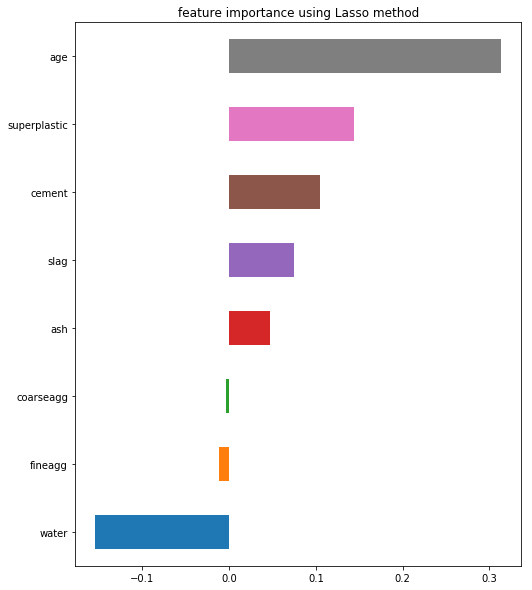

In [99]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize']=(8.0,10.0)
imp_coef.plot(kind = "barh")
plt.title("feature importance using Lasso method")

In [106]:
# we will drop ash, corseagg and ash and rebuild the regression model
concrete_data5 = concrete_data1.copy()

In [107]:
concrete_data5 = concrete_data5.drop("ash", axis = 1)
concrete_data5 = concrete_data5.drop("coarseagg", axis = 1)
concrete_data5 = concrete_data5.drop("fineagg", axis = 1)

In [115]:
model6 = LinearRegression()
X6 = concrete_data5.iloc[:,0:5]
y6 = concrete_data5.iloc[:,5]

In [116]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size = 0.30, random_state = 1)

In [117]:
model6.fit(X7_train, y7_train)
for idx, col_name in enumerate(X6_train.columns):
    print("The  coefficient of  {} is {}".format(col_name,regression_model.coef_[idx]))


The  coefficient of  cement is 0.10735780883299735
The  coefficient of  slag is 0.07195083009022812
The  coefficient of  water is 0.04501272641040533
The  coefficient of  superplastic is -0.14485171339760952
The  coefficient of  age is 0.18648383240921632


In [120]:
model6.score(X6_test, y6_test)

0.6773245363954554